# Loopless FBA

To simulate FBA, loopless was also used, as it might be the better solution, compared to dFBA, as psilocybin is spontaneously dephosphorylated and phosphorylated again using the psiK enzyme, which is a looped reaction. 

#### Importing the model with the YEPD medium and libraries used for visualization.

In [6]:
%run Medium_significance.ipynb

from cobra.flux_analysis.loopless import add_loopless, loopless_solution
from cobra.flux_analysis import pfba

'' is not a valid SBML 'SId'.


Maximum theoretical biomass productivity: 0.9398547241492603 mmol/(gdw*h)
Maximum theoretical productivity of psilocybin_synthase reaction: 3.0787126793330786 mmol/(gdw*h)
Maximum theoretical biomass productivity: 15.675217280226356 mmol/(gdw*h)
Maximum theoretical productivity of psilocybin_synthase reaction: 57.96313293559737 mmol/(gdw*h
0.0
52.65029830197339
0.0
54.31925959920456
0.0
52.497322931008114
0.0
53.40829126510632
0.0
50.67538626281172
0.0
52.42312987608998
0.0
52.497322931008114
0.0
52.193666819642075


Running the medium significance notebook (above) produces an output as some statements are printet in the notebook. These statements can be ignored.

Setting the model objective to psilocybin synthase and creating two variables containing the nominal optimal solution and the loopless solution, which has the goal of identifying a thermodynamically consistent flux state without the loops in the model.

In [7]:
model.objective = model.reactions.psiM 
nominal = model.optimize()
loopless = loopless_solution(model)

Importing pandas to make a dataframe with a dict containing the loopless and nominal fluxes.

In [8]:
import pandas
df = pandas.DataFrame(dict(loopless=loopless.fluxes, nominal=nominal.fluxes))

Plotting the loopless and nominal values to visualize the results.

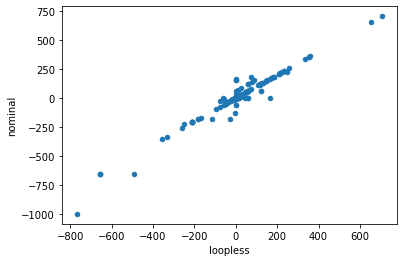

In [9]:
df.plot.scatter(x='loopless', y='nominal')

Last, but not least, finding the solution status and the loopless solution flux for psiM.

In [10]:
solution = pfba(model)
print("parsimonious solution: status = " + solution.status)
print("loopless solution flux: psiM = %.4f" % solution.fluxes["psiM"])

parsimonious solution: status = optimal
loopless solution flux: psiM = 57.9631
